# Part-A Airbnb Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
airbnb_data = pd.read_csv("Airbnb_data - airbnb_data.csv")
airbnb_data.head(5)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


Exploratory Data Analysis

In [3]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [4]:
airbnb_data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Data Cleaning

In [5]:
airbnb_data = airbnb_data.dropna().reset_index(drop=True)        #removing the rows with NaN
airbnb_data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
1,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
2,12422935,4.442651,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,...,37.753164,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0
3,13971273,4.787492,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,...,34.046737,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0
4,180792,4.787492,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,...,37.781128,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0


# Feature Engineering : 

Number of Amenities using Amenities column and extracting the count
Host activity metric using column host_since to extract the experience level of host
Neighbourhood popularity using the columns number_of_review(standardizing the values) and multiplying it with reviews_score_rating


In [6]:
# Counting the number of amenities
airbnb_data["amenities_count"] = airbnb_data["amenities"].str.count(",")

In [7]:
#converting data type of column host_since
airbnb_data['host_since'] = pd.to_datetime(airbnb_data['host_since'], format='%d-%m-%Y')
today = pd.to_datetime(datetime.today())
airbnb_data['host_experience']= (today - airbnb_data['host_since']).dt.days / 365

In [8]:
#converting neighbour popularity by standardizing the number_of_reviews column
airbnb_data['number_of_reviews_std'] = (airbnb_data['number_of_reviews'] - airbnb_data[
    'number_of_reviews'].mean()) / airbnb_data['number_of_reviews'].std()

#then multiplying the number of reviews(standard) with review_scores_rating
airbnb_data['neighbourhood_pop'] = airbnb_data['number_of_reviews_std']*airbnb_data['review_scores_rating']*0.01 #as the ratings are in percentage

airbnb_data.drop(columns='number_of_reviews_std', inplace=True)     #dropping the helper column for standardization

# Data Transformations
The columns host_identity_verified and instant_bookable can be converted to boolean data type by mapping the values

In [9]:
airbnb_data['host_identity_verified'] = airbnb_data['host_identity_verified'].map({'t':True, 'f':False}).astype(bool)
airbnb_data['instant_bookable'] = airbnb_data['instant_bookable'].map({'t':True, 'f':False}).astype(bool)

In [10]:
#removing some unnecessary columns
airbnb_data.drop(columns=[
    'id', 'amenities', 'description', 'first_review','last_review',
      'host_has_profile_pic','host_since', 'name', 'number_of_reviews', 'review_scores_rating',
      'neighbourhood', 'thumbnail_url', 'zipcode'
      ], inplace= True)
airbnb_data['host_response_rate'] = airbnb_data['host_response_rate'].str.rstrip('%').astype(float) / 100

# Encoding the data 
with categorical values using label_encoders module

In [11]:
label_encoders = {}
for column in ['property_type','room_type','bed_type','cancellation_policy', 'cleaning_fee',
               'city', 'host_identity_verified','instant_bookable']:
    le = LabelEncoder()
    airbnb_data[column]= le.fit_transform(airbnb_data[column])
    label_encoders[column]= le



Finding outliers from the log_price column
There are some outliers in the log_price column 

<Axes: ylabel='log_price'>

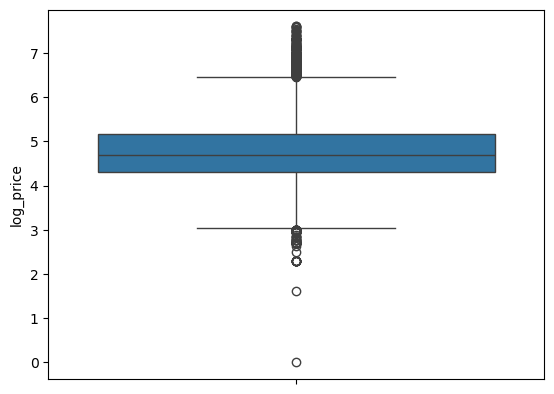

In [12]:
sns.boxplot(airbnb_data['log_price'])

Plotting a correlation heatmap to get a better understanding of the dataset

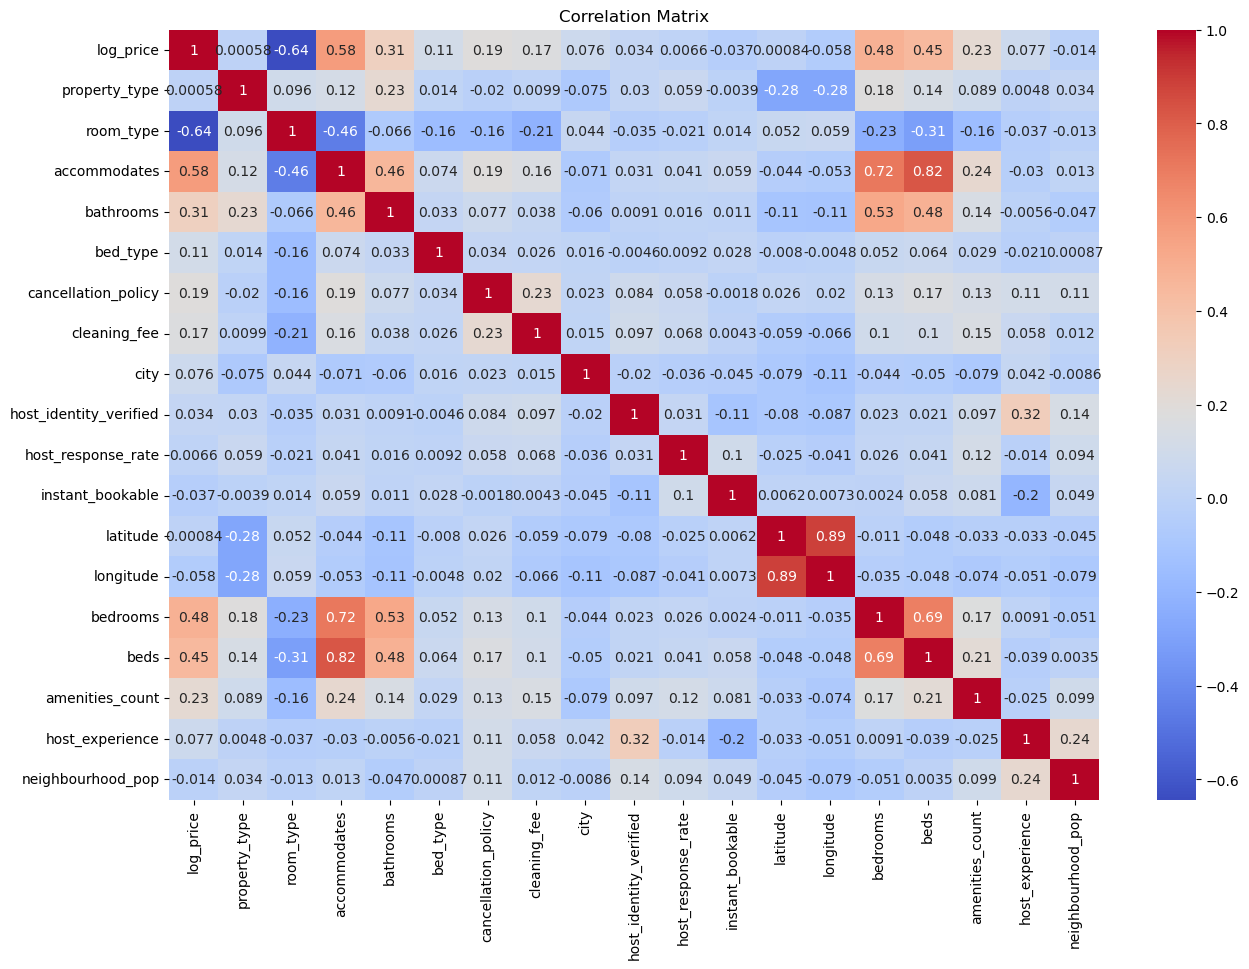

In [13]:
correlation_matrix = airbnb_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

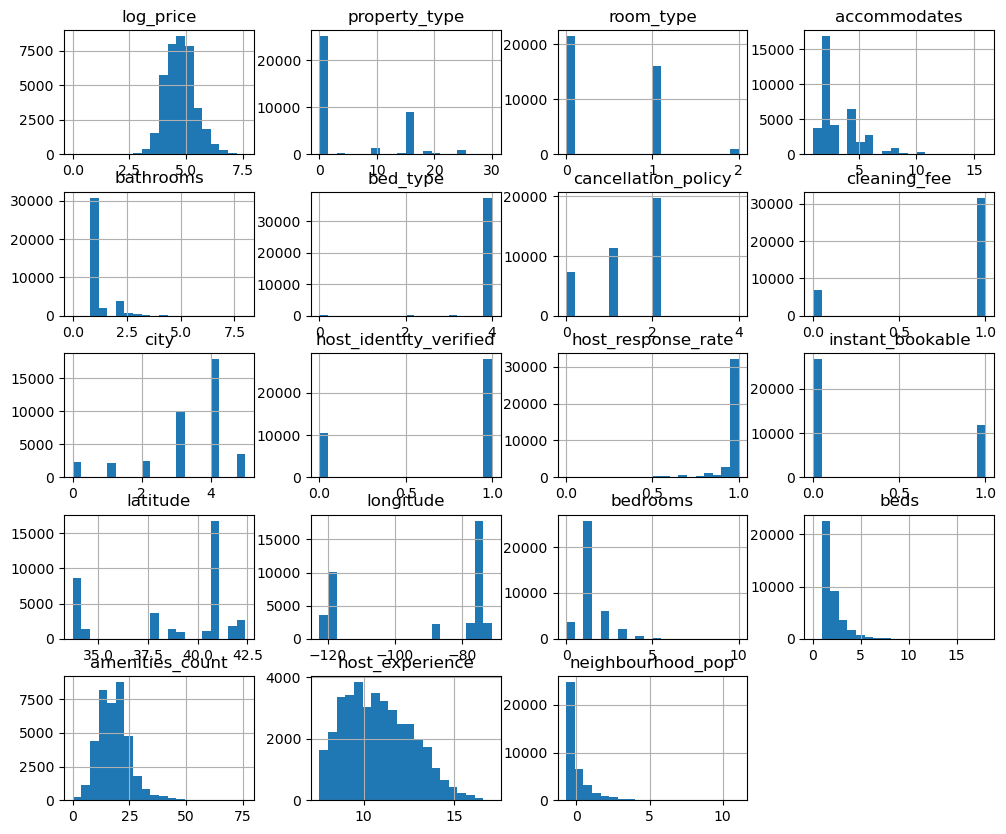

In [14]:
airbnb_data.hist(figsize=(12,10), bins=20)
plt.show()

Splitting the dataset into training and prediction

In [15]:
X = airbnb_data.drop(columns=['log_price'])
Y = airbnb_data['log_price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression Algorithm (Optimised)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Hyperparameters to tune
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Optional; use only if sklearn version >= 0.24
}

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_linear = grid_search.predict(X_test)

Best Parameters: {'fit_intercept': True, 'positive': False}


In [18]:
#Performance Metrics
mse_lr = mean_squared_error(y_test, y_pred_linear)
rmse_lr = mse_lr**0.5
r2_lr = r2_score(y_test, y_pred_linear)

print("Test MSE:", mse_lr)
print("Test RMSE:", rmse_lr)
print("Test R2 Score:", round(r2_lr*100,2),"%")

Test MSE: 0.1770636634347197
Test RMSE: 0.42078933379390654
Test R2 Score: 58.52 %


# Random Forest Algorithm (Optimised)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)
# Predict on the test set
y_pred_rf = grid_search_rf.predict(X_test)
# Best parameters
print("Best Parameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
#performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Test MSE:", mse_rf)
print("Test R2 Score:", round(r2_rf*100,2),"%")

Test MSE: 0.1042163417166504
Test R2 Score: 75.59 %


# XGBoost Algorithm (Optimised)

In [21]:
import xgboost
xgb_model = XGBRegressor(objective='reg:squarederror')

# Define parameter grid for tuning
param_grid_xg = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'gamma': [0, 0.1, 0.2]
}

# Perform GridSearchCV
grid_search_xg = GridSearchCV(xgb_model, param_grid_xg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xg.fit(X_train, y_train)

# Best model and evaluation
best_model_xg = grid_search_xg.best_estimator_
y_pred_xg = best_model_xg.predict(X_test)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [22]:
#oerformance metrics
mse_xg = mean_squared_error(y_test, y_pred_xg)
rmse_xg = mse_xg**0.5
r2_xg = r2_score(y_test, y_pred_xg)
print("Best Parameters:", grid_search_xg.best_params_)
print("MSE for XGBoost:", mse_xg)
print("RMSE for XGBoost:", rmse_xg)
print(f'R square for XGBoost: {round(r2_xg*100,2)} %')

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
MSE for XGBoost: 0.09799757629216688
RMSE for XGBoost: 0.31304564570069787
R square for XGBoost: 77.04 %


# SVM Model

In [23]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1) #creating instance
# Fit the model
svr.fit(X_train, y_train)
# Predict on the test set
y_pred_svr = svr.predict(X_test)
# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


In [24]:
#performance metrics
print("Test MSE:", round(mse_svr,4))
print("Test RMSE:", round(mse_svr**0.5,4) )
print("Test R2 Score:", round(r2_svr*100,2),"%")

Test MSE: 0.1764
Test RMSE: 0.42
Test R2 Score: 58.68 %


# Final Decision

r2 value for Linear Regression Model: 58.52%
r2 value for Random Forest Model:     75.58%
r2 value for XGBoost Model:           77.04%
r2 value for SVM Model:               58.68%  

So we can conclude that the best model for our analysis and future prediction is XGBoost (Optimised).

Listing the top features from XGBoost (optimised) model

In [25]:
best_xgb_model = grid_search_xg.best_estimator_

# Get importance from underlying Booster
booster = best_xgb_model.get_booster()
importance = booster.get_score(importance_type='gain')

# Convert to DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Gain': list(importance.values())
}).sort_values(by='Gain', ascending=False)

# Show top 10 important features
print(importance_df.head(10))

            Feature       Gain
1         room_type  53.486439
3         bathrooms   9.692591
13         bedrooms   8.117875
7              city   5.502717
2      accommodates   3.307430
12        longitude   2.582543
11         latitude   1.572793
14             beds   1.349746
0     property_type   0.625450
15  amenities_count   0.619143


C:\Users\debon\AppData\Local\Temp\ipykernel_8996\2462492591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gain', y='Feature', data=importance_df.head(10), palette='viridis')


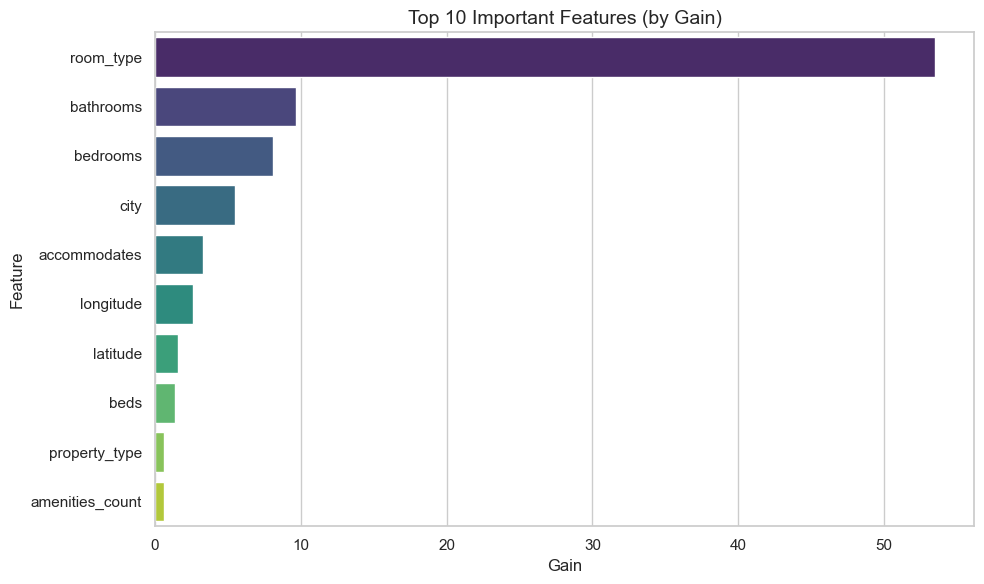

In [ ]:
# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Gain', y='Feature', data=importance_df.head(10), palette='viridis')

plt.title('Top 10 Important Features (by Gain)', fontsize=14)
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Insights on factors influencing the prices

The XGBoost model using GridSearchCV reveals that room type is by far the most influential factor in determining Airbnb property prices. This makes sense, as the level of privacy and luxury significantly impacts how much guests are willing to pay. The second and third most impactful features are number of bathrooms and bedrooms, which reflect the size and comfort level of the property. More bathrooms offer greater convenience, especially for larger groups, while additional bedrooms increase occupancy potential and justify a higher price point.

Other important factors include the city in which the property is located and the number it can accommodate. Location drives pricing due to differences in tourism demand, local economy, and competition. Meanwhile, a property that can accommodate more guests tends to generate more revenue per night, especially in travel hotspots. Overall, your model suggests that listings with private or full-property access, more space, and in popular cities tend to be priced higher — a combination of privacy, convenience, and strategic location.

# Make Preditions

In [32]:
# Assumption Data
sample = np.array([[20, 0, 5, 1.5, 4 ,2 ,1 ,5 ,1 ,1 ,1 ,37.78 ,-121.5 ,1 ,3 ,20 ,10 ,1 ]])
price_prediction = grid_search_xg.predict(sample)
print("Log Price Prediction:", price_prediction)
print("Actual Price Prediction:", np.exp(price_prediction))

Log Price Prediction: [5.5016785]
Actual Price Prediction: [245.103]


Video Explanation Link:

https://drive.google.com/file/d/1OJLiCMSpPrujIyOrVGvXpNkFFGBe7VC-/view?usp=sharing